In [ ]:
import pandas as pd
df=pd.read_csv('/content/2023season_race_stats.csv')
print(df)
print(df.describe())
print(df.info())

         Track Position  No       Driver_Dup                      Team_Dup  \
0      Bahrain        1   1   Max Verstappen    Red Bull Racing Honda RBPT   
1      Bahrain        2  11     Sergio Perez    Red Bull Racing Honda RBPT   
2      Bahrain        3  14  Fernando Alonso  Aston Martin Aramco Mercedes   
3      Bahrain        4  55     Carlos Sainz                       Ferrari   
4      Bahrain        5  44   Lewis Hamilton                      Mercedes   
..         ...      ...  ..              ...                           ...   
435  Abu Dhabi       16   2   Logan Sargeant             Williams Mercedes   
436  Abu Dhabi       17  24      Guanyu Zhou            Alfa Romeo Ferrari   
437  Abu Dhabi       18  55     Carlos Sainz                       Ferrari   
438  Abu Dhabi       19  77  Valtteri Bottas            Alfa Romeo Ferrari   
439  Abu Dhabi       20  20  Kevin Magnussen                  Haas Ferrari   

              Driver                          Team       Q1    

In [ ]:

tracks = df["Track"][df["Track"].duplicated()]
tracksunique = tracks.unique()
print("The tracks in the F1 championship are:", tracksunique)

The tracks in the F1 championship are: ['Bahrain' 'Saudi Arabia' 'Australia' 'Azerbaijan' 'Miami' 'Monaco'
 'Spain' 'Canada' 'Austria' 'Great Britain' 'Hungary' 'Belgium'
 'Netherlands' 'Italy' 'Singapore' 'Japan' 'Qatar' 'United States'
 'Mexico' 'Brazil' 'Las Vegas' 'Abu Dhabi']


In [ ]:
drivers = df["Driver"][df["Driver"].duplicated()]
driversunique = drivers.unique()
print("the drivers running in the Formula-1 racing championship are", driversunique)
teams1 = df["Team"][df["Team"].duplicated()]
teamunique = teams1.unique()
print("The unique teams in the F1 championship are:", teamunique)


the drivers running in the Formula-1 racing championship are ['Sergio Perez' 'Max Verstappen' 'Fernando Alonso' 'George Russell'
 'Lewis Hamilton' 'Carlos Sainz' 'Charles Leclerc' 'Esteban Ocon'
 'Pierre Gasly' 'Kevin Magnussen' 'Yuki Tsunoda' 'Nico Hulkenberg'
 'Guanyu Zhou' 'Nyck De Vries' 'Oscar Piastri' 'Logan Sargeant'
 'Lando Norris' 'Valtteri Bottas' 'Alexander Albon' 'Lance Stroll'
 'Daniel Ricciardo' 'Liam Lawson']
The unique teams in the F1 championship are: ['Red Bull Racing Honda RBPT' 'Aston Martin Aramco Mercedes' 'Mercedes'
 'Williams Mercedes' 'AlphaTauri Honda RBPT' 'Haas Ferrari'
 'Alfa Romeo Ferrari' 'Alpine Renault' 'Ferrari' 'McLaren Mercedes']


In [ ]:
racePoints = df.groupby(['Driver', 'Team'])['Points'].sum().sort_values(ascending=False)
driverStandings = racePoints.fillna(0).sort_values(ascending=False)
driverStandings = pd.DataFrame(driverStandings).reset_index()
driverStandings['POS'] = range(1,23)
driverStandings['Points'] = driverStandings['Points'].astype(int)
driverStandings.set_index('POS', inplace=True)
print(driverStandings)

               Driver                          Team  Points
POS                                                        
1      Max Verstappen    Red Bull Racing Honda RBPT     530
2        Sergio Perez    Red Bull Racing Honda RBPT     260
3      Lewis Hamilton                      Mercedes     217
4     Fernando Alonso  Aston Martin Aramco Mercedes     198
5     Charles Leclerc                       Ferrari     185
6        Lando Norris              McLaren Mercedes     184
7        Carlos Sainz                       Ferrari     178
8      George Russell                      Mercedes     157
9       Oscar Piastri              McLaren Mercedes      82
10       Lance Stroll  Aston Martin Aramco Mercedes      68
11       Esteban Ocon                Alpine Renault      56
12       Pierre Gasly                Alpine Renault      54
13    Alexander Albon             Williams Mercedes      25
14       Yuki Tsunoda         AlphaTauri Honda RBPT      14
15    Valtteri Bottas            Alfa Ro

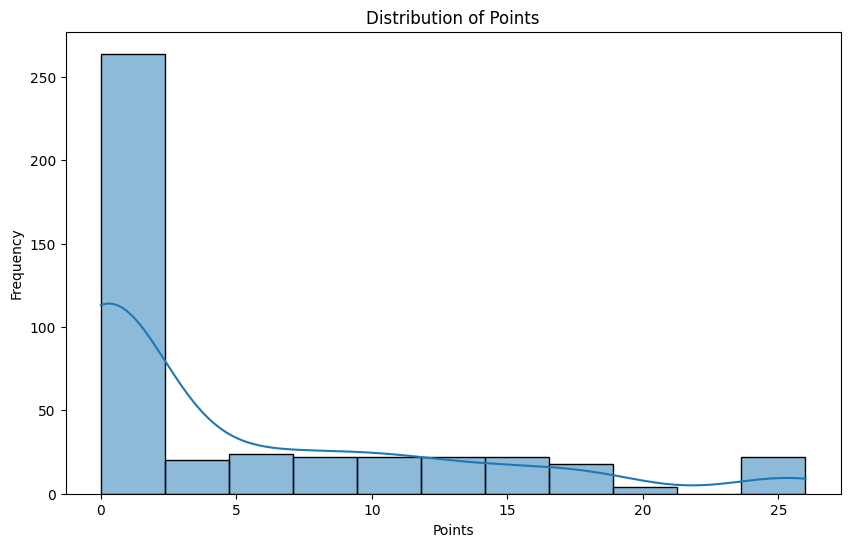

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Points'], kde=True)
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

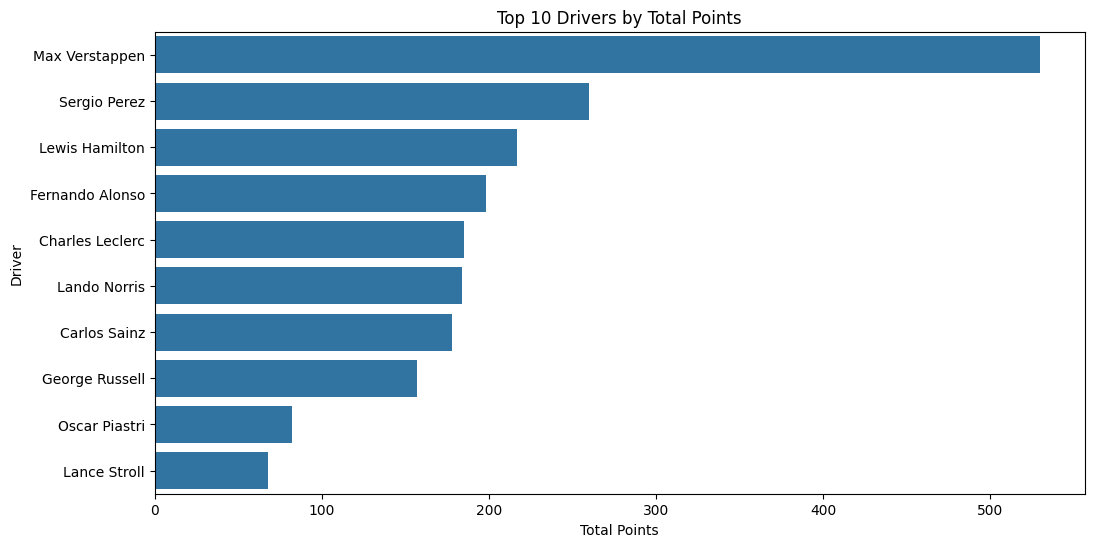

In [ ]:
top_10_drivers = driverStandings.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Points', y='Driver', data=top_10_drivers)
plt.title('Top 10 Drivers by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.show()


                           Team  Points
0    Red Bull Racing Honda RBPT     790
1                      Mercedes     374
2                       Ferrari     363
3  Aston Martin Aramco Mercedes     266
4              McLaren Mercedes     266
5                Alpine Renault     110
6             Williams Mercedes      26
7         AlphaTauri Honda RBPT      22
8            Alfa Romeo Ferrari      16
9                  Haas Ferrari       9


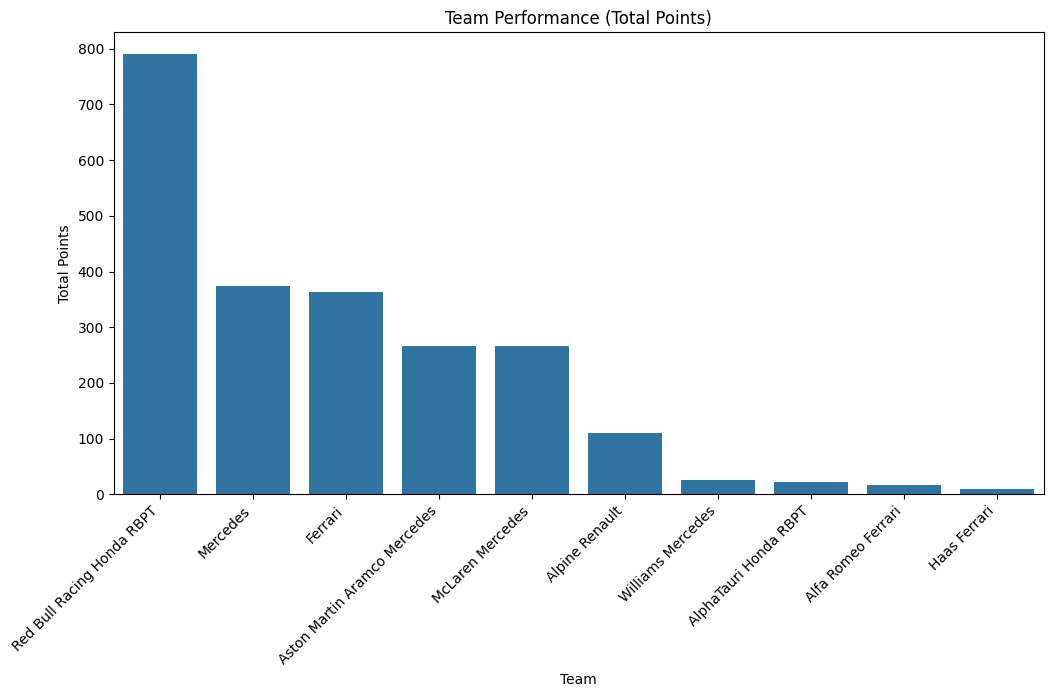

In [ ]:
team_points = df.groupby('Team')['Points'].sum().sort_values(ascending=False)
teamStandings = pd.DataFrame(team_points).reset_index()
print(teamStandings)
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Points',data=teamStandings)
plt.title('Team Performance (Total Points)')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.xticks(rotation=45, ha='right')
plt.show()

              Driver     Points
0     Max Verstappen  24.090909
1       Sergio Perez  11.818182
2     Lewis Hamilton   9.863636
3    Fernando Alonso   9.000000
4    Charles Leclerc   8.409091
5       Lando Norris   8.363636
6       Carlos Sainz   8.090909
7     George Russell   7.136364
8      Oscar Piastri   3.727273
9       Lance Stroll   3.090909
10      Esteban Ocon   2.545455
11      Pierre Gasly   2.454545
12   Alexander Albon   1.136364
13  Daniel Ricciardo   0.857143
14      Yuki Tsunoda   0.636364
15   Valtteri Bottas   0.454545
16       Liam Lawson   0.400000
17   Nico Hulkenberg   0.272727
18       Guanyu Zhou   0.272727
19   Kevin Magnussen   0.136364
20    Logan Sargeant   0.045455
21     Nyck De Vries   0.000000


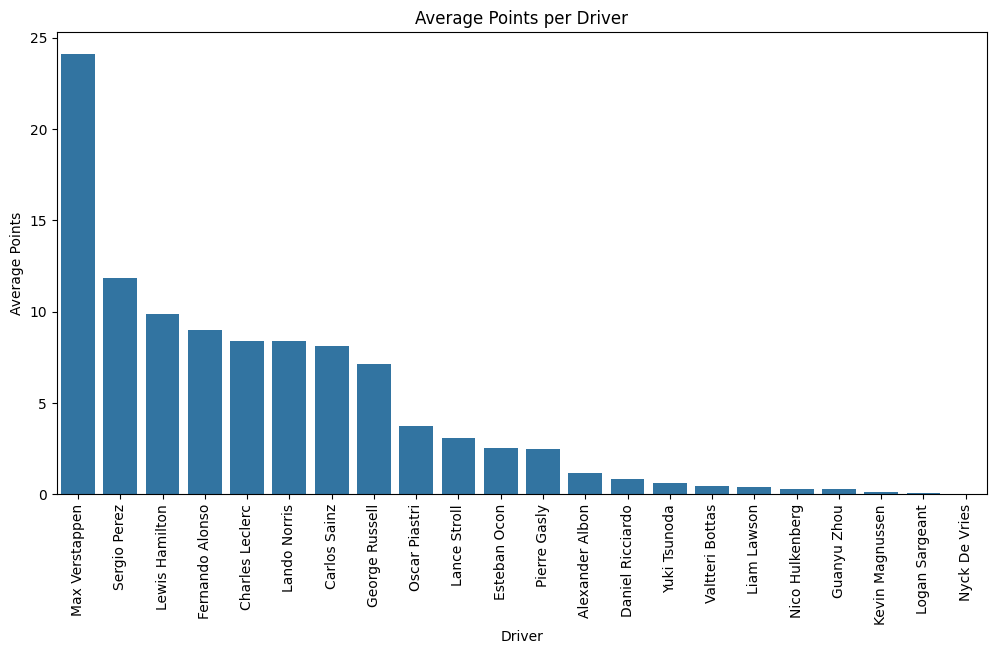

In [ ]:
avg_points_driver = df.groupby('Driver')['Points'].mean().sort_values(ascending=False)
driveravg = pd.DataFrame(avg_points_driver).reset_index()
print(driveravg)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_points_driver.index, y=avg_points_driver.values)
plt.title('Average Points per Driver')
plt.xlabel('Driver')
plt.ylabel('Average Points')
plt.xticks(rotation=90)
plt.show()

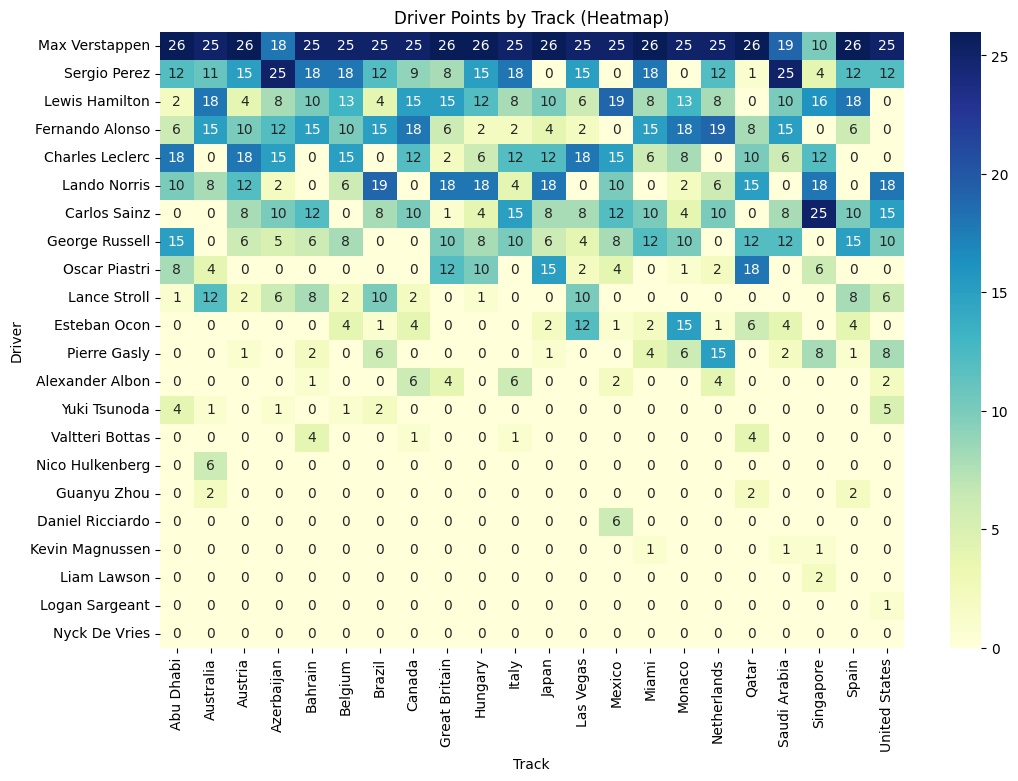

In [ ]:
driver_track_points = df.pivot_table(index='Driver', columns='Track', values='Points', aggfunc='sum', fill_value=0)
driver_points = df.groupby('Driver')['Points'].sum().sort_values(ascending=False)
sorted_drivers = driver_points.index
driver_track_points_sorted = driver_track_points.loc[sorted_drivers]
plt.figure(figsize=(12, 8))
sns.heatmap(driver_track_points_sorted, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Driver Points by Track (Heatmap)")
plt.xlabel("Track")
plt.ylabel("Driver")
plt.show()

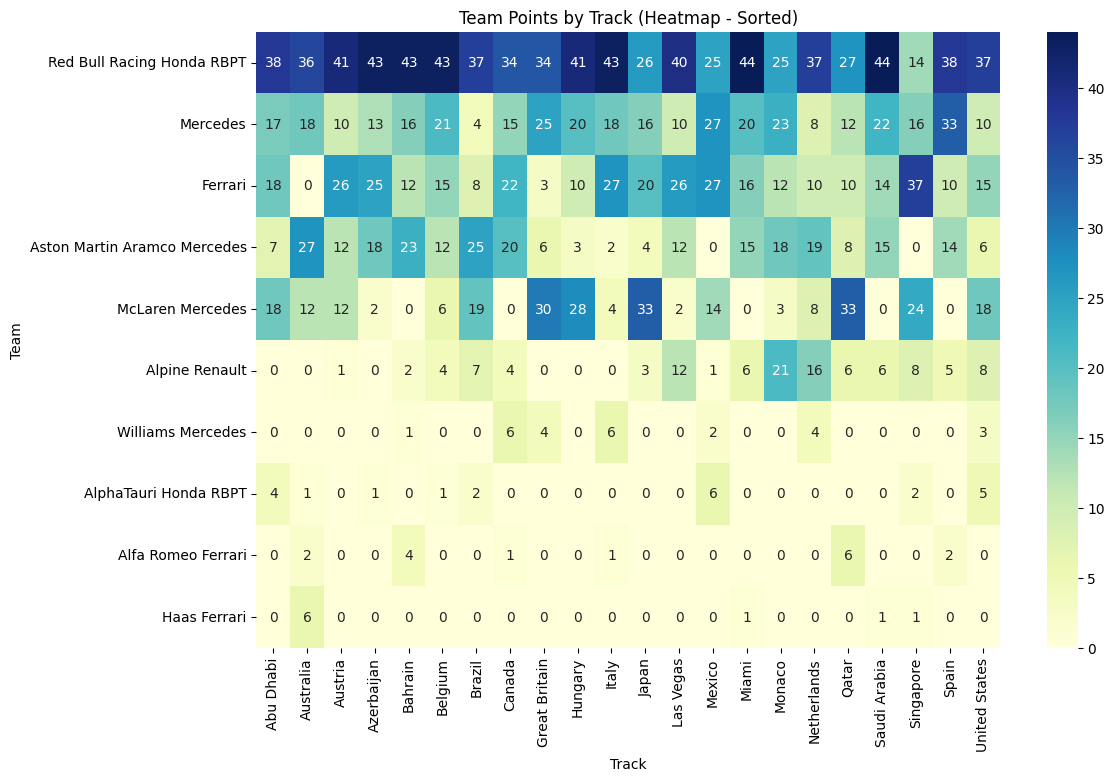

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
team_track_points = df.pivot_table(index='Team', columns='Track', values='Points', aggfunc='sum', fill_value=0)
team_points = df.groupby('Team')['Points'].sum().sort_values(ascending=False)
sorted_teams = team_points.index
team_track_points_sorted = team_track_points.loc[sorted_teams]
plt.figure(figsize=(12, 8))
sns.heatmap(team_track_points_sorted, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Team Points by Track (Heatmap - Sorted)")
plt.xlabel("Track")
plt.ylabel("Team")
plt.show()

In [ ]:
fastest_lap_counts = df.groupby('Driver')['Set Fastest Lap'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Fastest Lap Counts')
total_races = df.groupby('Driver')['Track'].count().reset_index(name='Total Races')
result = pd.merge(fastest_lap_counts, total_races, on='Driver')
result

,Driver,Fastest Lap Counts,Total Races
0,Alexander Albon,0,22
1,Carlos Sainz,0,22
2,Charles Leclerc,0,22
3,Daniel Ricciardo,0,7
4,Esteban Ocon,0,22
5,Fernando Alonso,1,22
6,George Russell,1,22
7,Guanyu Zhou,1,22
8,Kevin Magnussen,0,22
9,Lance Stroll,0,22


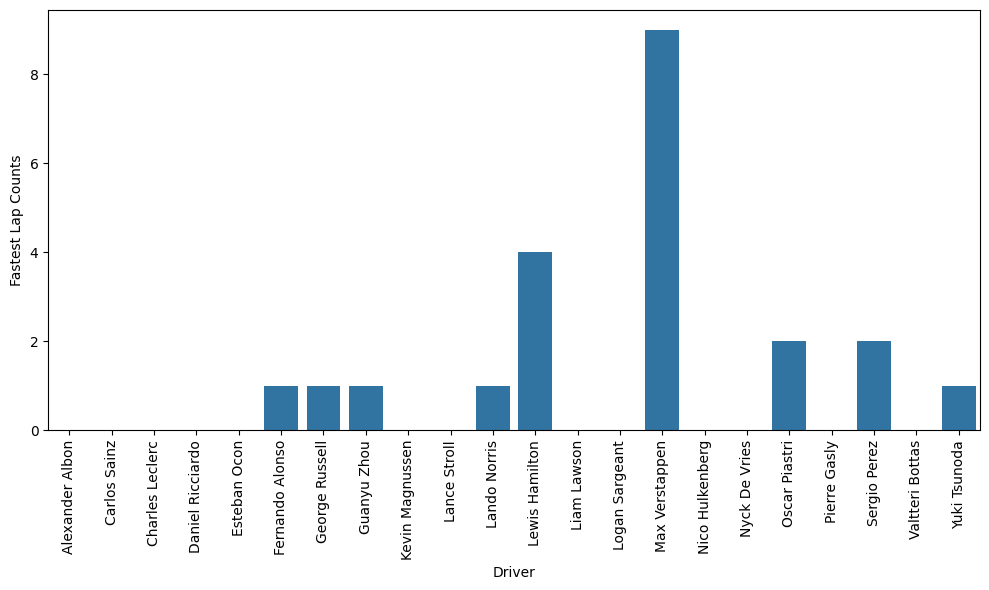

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Driver', y='Fastest Lap Counts', data=result)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

                             Team           Driver          Track Position
17                 Alpine Renault     Esteban Ocon        Bahrain       NC
18                        Ferrari  Charles Leclerc        Bahrain       NC
19               McLaren Mercedes    Oscar Piastri        Bahrain       NC
38              Williams Mercedes  Alexander Albon   Saudi Arabia       NC
39   Aston Martin Aramco Mercedes     Lance Stroll   Saudi Arabia       NC
57                       Mercedes   George Russell      Australia       NC
58              Williams Mercedes  Alexander Albon      Australia       NC
59                        Ferrari  Charles Leclerc      Australia       NC
78             Alfa Romeo Ferrari      Guanyu Zhou     Azerbaijan       NC
79          AlphaTauri Honda RBPT    Nyck De Vries     Azerbaijan       NC
119  Aston Martin Aramco Mercedes     Lance Stroll         Monaco       NC
158                      Mercedes   George Russell         Canada       NC
159             Williams 

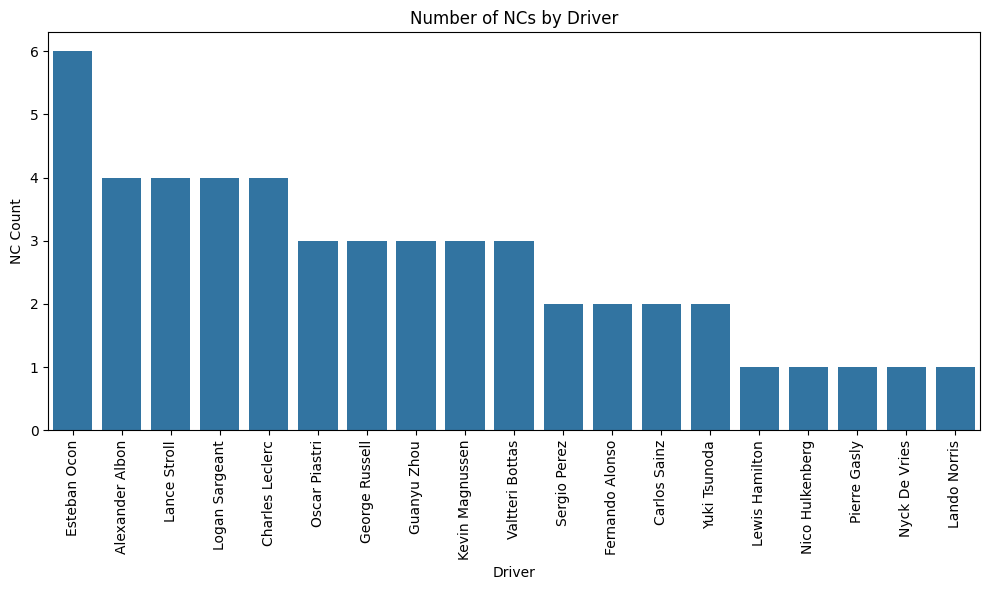

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nc_dnf_data = df[df['Position'].isin(['NC'])]
print(nc_dnf_data[['Team', 'Driver', 'Track', 'Position']])
nc_counts = nc_dnf_data['Driver'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=nc_counts.index, y=nc_counts.values)
plt.title('Number of NCs by Driver')
plt.xlabel('Driver')
plt.ylabel('NC Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

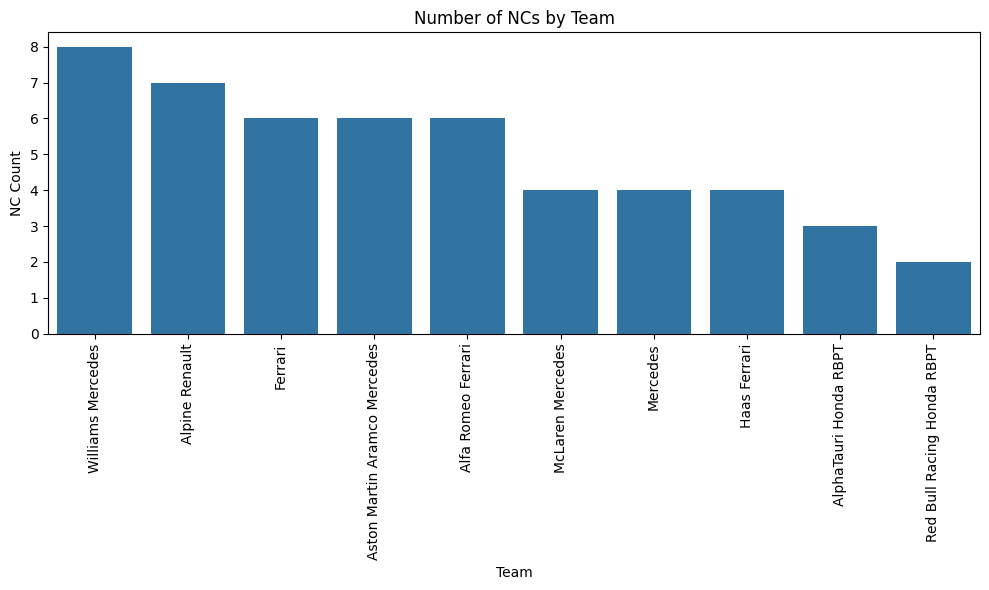

In [ ]:
nc_counts = nc_dnf_data['Team'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=nc_counts.index, y=nc_counts.values)
plt.title('Number of NCs by Team')
plt.xlabel('Team')
plt.ylabel('NC Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

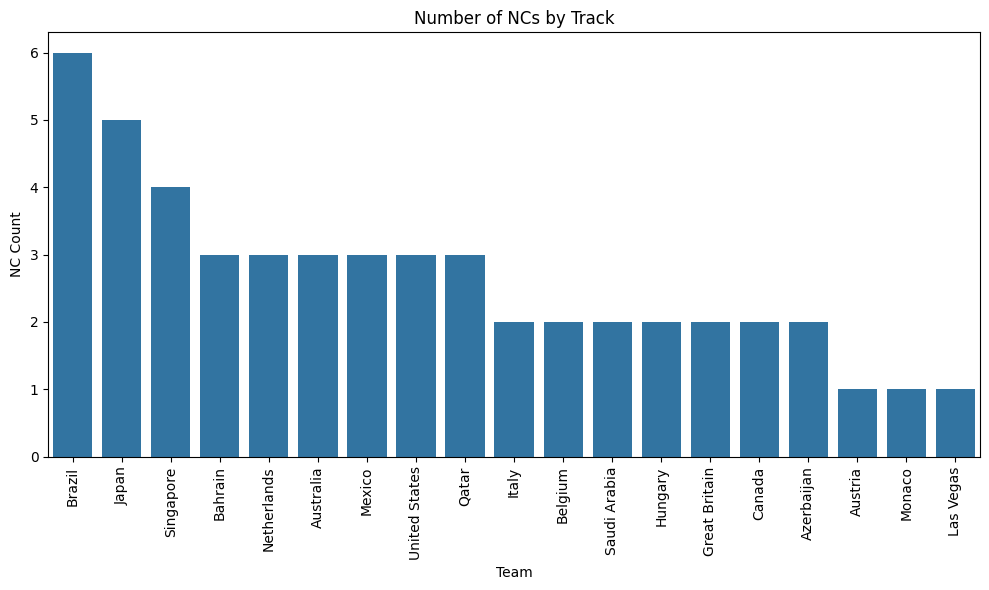

In [ ]:
nc_counts = nc_dnf_data['Track'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=nc_counts.index, y=nc_counts.values)
plt.title('Number of NCs by Track')
plt.xlabel('Team')
plt.ylabel('NC Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
nc_dnf_data = df[df['Q1'].isin(['DNF'])]
print(nc_dnf_data[['Team', 'Driver', 'Track', 'Q1']])

                             Team          Driver      Track   Q1
44     Red Bull Racing Honda RBPT    Sergio Perez  Australia  DNF
316             Williams Mercedes  Logan Sargeant      Japan  DNF
376  Aston Martin Aramco Mercedes    Lance Stroll     Mexico  DNF
435             Williams Mercedes  Logan Sargeant  Abu Dhabi  DNF


In [ ]:
import pandas as pd
nc_dnf_data = df[df['Q2'].isin(['DNF'])]
print(nc_dnf_data[['Team', 'Driver', 'Track', 'Q2']])

                      Team           Driver      Track   Q2
9        Williams Mercedes  Alexander Albon    Bahrain  DNF
298  AlphaTauri Honda RBPT     Yuki Tsunoda  Singapore  DNF
369         Alpine Renault     Esteban Ocon     Mexico  DNF


In [ ]:
import pandas as pd
nc_dnf_data = df[df['Q3'].isin(['DNF'])]
print(nc_dnf_data[['Team', 'Driver', 'Track', 'Q3']])

                           Team           Driver    Track   Q3
14                 Haas Ferrari  Nico Hulkenberg  Bahrain  DNF
80   Red Bull Racing Honda RBPT   Max Verstappen    Miami  DNF
143                     Ferrari  Charles Leclerc   Canada  DNF
322            McLaren Mercedes     Lando Norris    Qatar  DNF
393            McLaren Mercedes    Oscar Piastri   Brazil  DNF


                             Team           Driver          Track Time/Retired
17                 Alpine Renault     Esteban Ocon        Bahrain          DNF
18                        Ferrari  Charles Leclerc        Bahrain          DNF
19               McLaren Mercedes    Oscar Piastri        Bahrain          DNF
38              Williams Mercedes  Alexander Albon   Saudi Arabia          DNF
39   Aston Martin Aramco Mercedes     Lance Stroll   Saudi Arabia          DNF
52                 Alpine Renault     Pierre Gasly      Australia          DNF
53                 Alpine Renault     Esteban Ocon      Australia          DNF
54          AlphaTauri Honda RBPT    Nyck De Vries      Australia          DNF
55              Williams Mercedes   Logan Sargeant      Australia          DNF
56                   Haas Ferrari  Kevin Magnussen      Australia          DNF
57                       Mercedes   George Russell      Australia          DNF
58              Williams Mercedes  Alexander Albon  

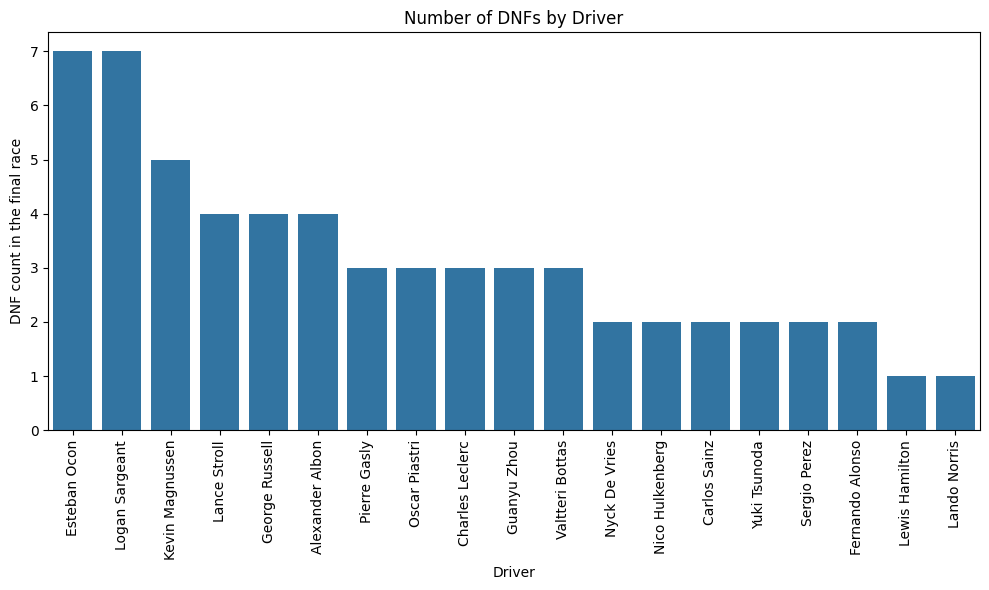

In [ ]:
import pandas as pd
nc_dnf_data = df[df['Time/Retired'].isin(['DNF'])]
print(nc_dnf_data[['Team', 'Driver', 'Track', 'Time/Retired']])
nc_counts = nc_dnf_data['Driver'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=nc_counts.index, y=nc_counts.values)
plt.title('Number of DNFs by Driver')
plt.xlabel('Driver')
plt.ylabel('DNF count in the final race')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


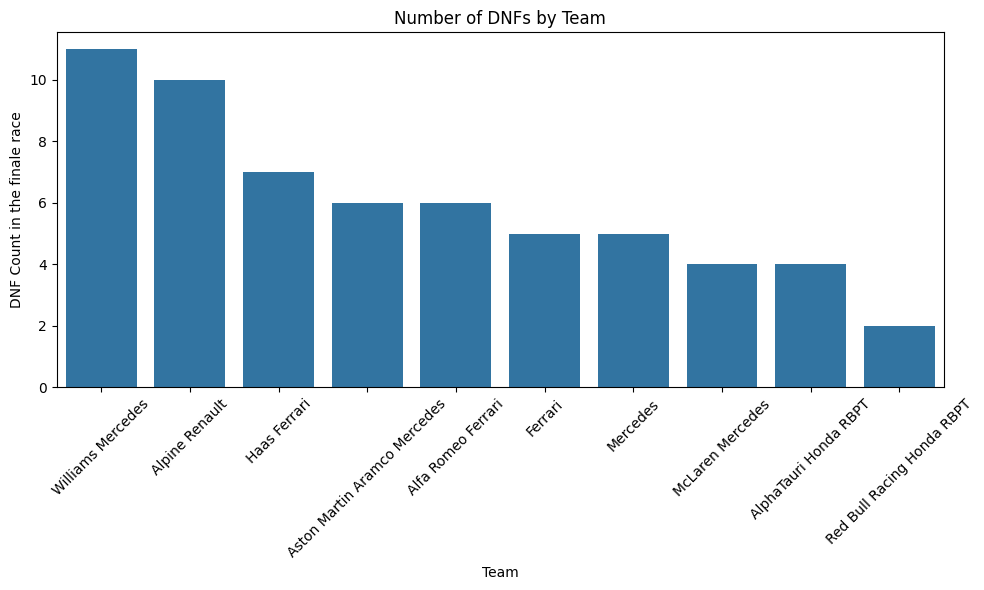

In [ ]:
nc_counts = nc_dnf_data['Team'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=nc_counts.index, y=nc_counts.values)
plt.title('Number of DNFs by Team')
plt.xlabel('Team')
plt.ylabel('DNF Count in the finale race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


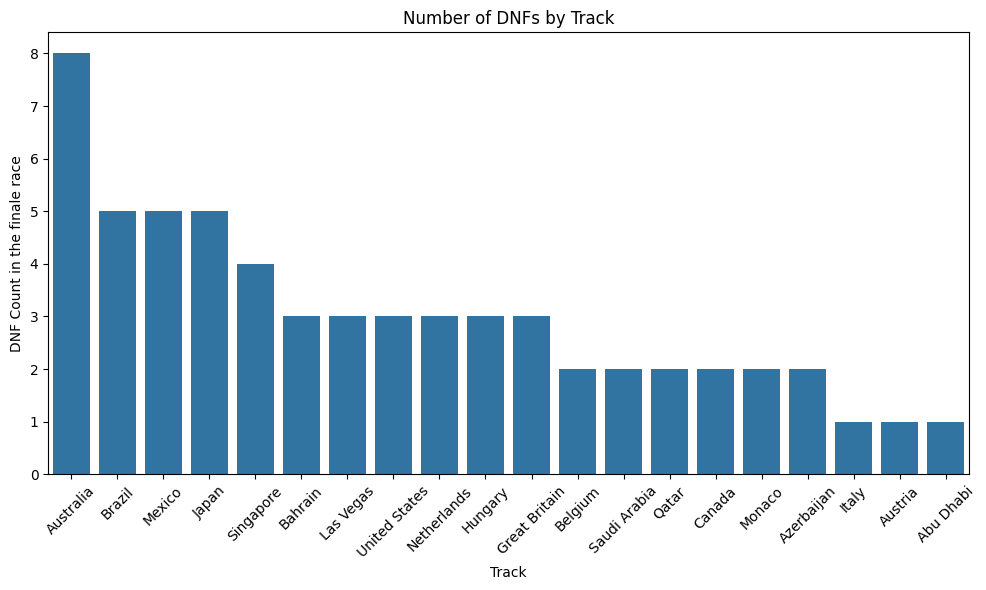

In [ ]:
nc_counts = nc_dnf_data['Track'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=nc_counts.index, y=nc_counts.values)
plt.title('Number of DNFs by Track')
plt.xlabel('Track')
plt.ylabel('DNF Count in the finale race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

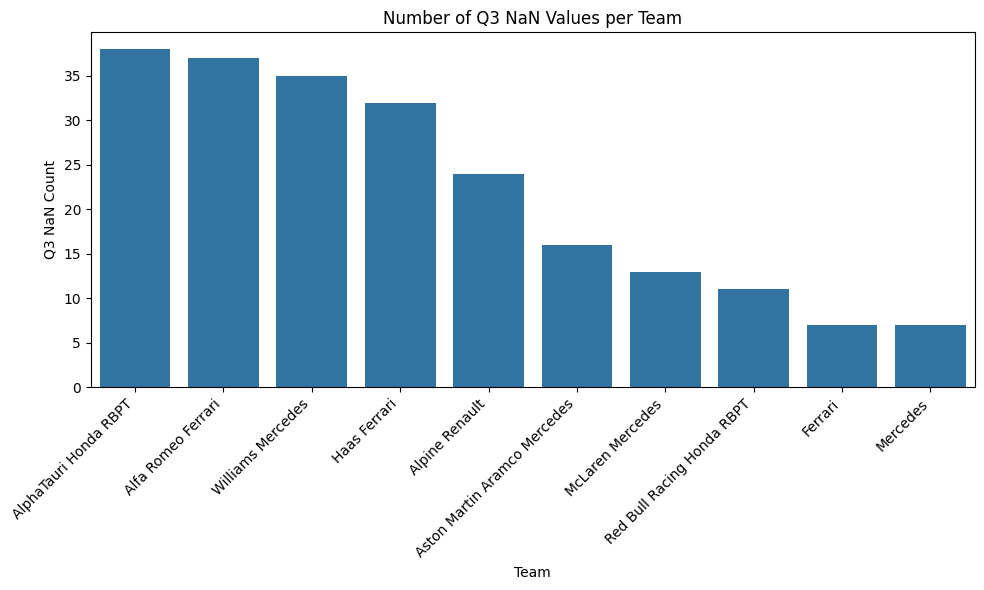

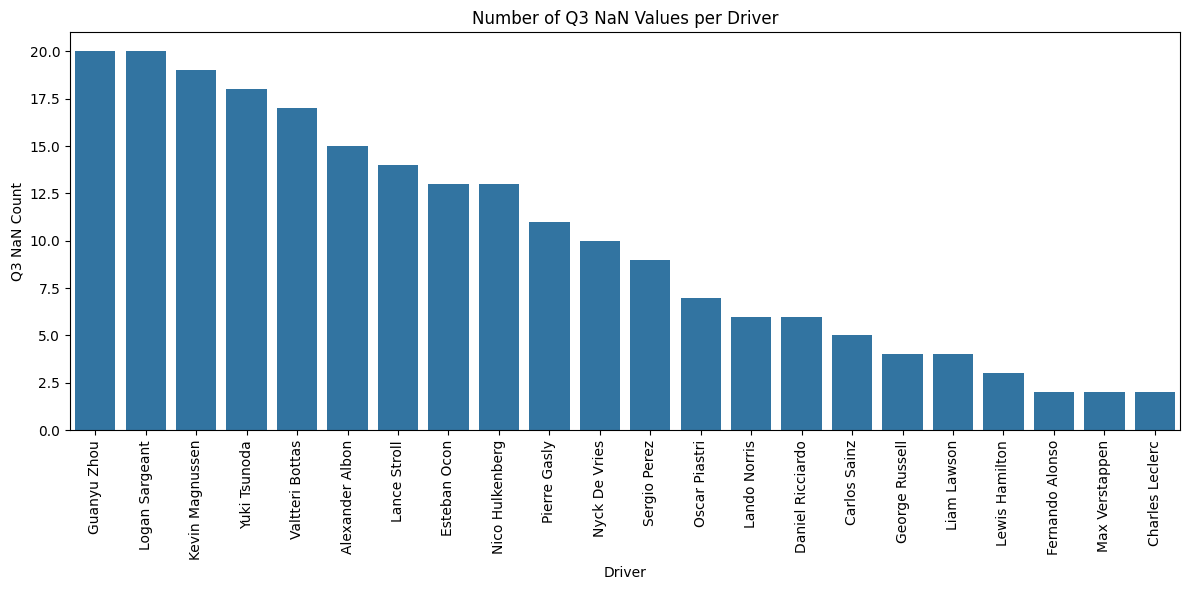

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/2023season_race_stats.csv')
q3_nan_teams = df[df['Q3'].isna()].groupby('Team')['Q3'].size().sort_values(ascending=False)
q3_nan_drivers = df[df['Q3'].isna()].groupby('Driver')['Q3'].size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=q3_nan_teams.index, y=q3_nan_teams.values)
plt.title('Number of Q3 NaN Values per Team')
plt.xlabel('Team')
plt.ylabel('Q3 NaN Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x=q3_nan_drivers.index, y=q3_nan_drivers.values)
plt.title('Number of Q3 NaN Values per Driver')
plt.xlabel('Driver')
plt.ylabel('Q3 NaN Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()